# System case

$$
u_1' = - \mu (u_1 - u_2)
$$
$$
u_2' = \sin(t)
$$
$$
u_1(0) = 0; u_2(0) = 0
$$

In [1]:
from rk_methods import *
from imex_methods import *
from measure import*
from order_estimate import *

mu1 = 1
mu2 = 4
mu3 = 25

def f(mu, t, u):
    y0, y1 = u
    return np.asarray([0, np.sin(t)])

def g(mu, t, u):
    y0, y1 = u
    return np.asarray([- mu * (y0 - y1), 0])

y_0 = [0, 0.2]
Ns = list(range(30, 1501, 10))

In [2]:
gamma = (3 + np.sqrt(3)) / 6

A = [[gamma, 0], [1 - 2 * gamma, gamma]]
b = [1/2, 1/2]
c = [gamma, 1 - gamma]
A_ = [[0, 0, 0], [gamma, 0, 0], [gamma - 1, 2*(1 - gamma), 0]]
b_ = [0, 1/2, 1/2]

In [3]:
Tl = 0
Tr = 50
h_exact1, t_exact1, y_exact1 = IMEX(lambda t, u: f(mu1, t, u), ImplicitSolver(lambda t, u: g(mu1, t, u)), y_0, A, A_, b, b_, c, Tl, Tr, 2**13)
h_exact2, t_exact2, y_exact2 = IMEX(lambda t, u: f(mu2, t, u), ImplicitSolver(lambda t, u: g(mu2, t, u)), y_0, A, A_, b, b_, c, Tl, Tr, 2**13)
h_exact3, t_exact3, y_exact3 = IMEX(lambda t, u: f(mu3, t, u), ImplicitSolver(lambda t, u: g(mu3, t, u)), y_0, A, A_, b, b_, c, Tl, Tr, 2**13)

In [ ]:
def linear_interpolation(l, r, y_l, y_r, x):
    assert l <= x and x <= r
    return ((r - x) * y_l + (x - l) * y_r) / (r - l)

# Approximation of the solution with a fine grid and linear interpolation
def f_exact(t, t_exact, y_exact):
    single_var = False
    if isinstance(t, float) or isinstance(t, int):
        t = [t]
        single_var = True
    result = np.zeros((np.shape(t)[0], np.shape(y_exact)[1]))
    for i in range(len(t)):
        j = max(0, int((t[i] - Tl) * (len(t_exact) - 1) / (Tr - Tl)))
        if j + 1 >= len(t_exact):
            result[i] = y_exact[-1]
        else:
            result[i] = linear_interpolation(t_exact[j], t_exact[j + 1], y_exact[j], y_exact[j + 1], t[i])
    if single_var:
        result = result.flatten()
    return result

/home/peti/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


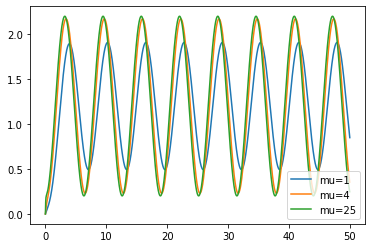

In [5]:
import matplotlib.pyplot as plt

plt.plot(t_exact1, y_exact1[:, 0], t_exact2, y_exact2[:, 0], t_exact3, y_exact3[:, 0])
plt.legend([f'mu={mu1}', f'mu={mu2}', f'mu={mu3}'])

In [6]:
table1 = create_mesasurement(lambda t, u: f(mu1, t, u), lambda t, u: g(mu1, t, u), A, A_, b, b_, c, Tl, Tr, lambda t: f_exact(t, t_exact1, y_exact1), [0.5, 0.1, 0.05], None, Ns, verbose=False)
table2 = create_mesasurement(lambda t, u: f(mu2, t, u), lambda t, u: g(mu2, t, u), A, A_, b, b_, c, Tl, Tr, lambda t: f_exact(t, t_exact2, y_exact2), [0.5, 0.1, 0.05], None, Ns, verbose=False)
table3 = create_mesasurement(lambda t, u: f(mu3, t, u), lambda t, u: g(mu3, t, u), A, A_, b, b_, c, Tl, Tr, lambda t: f_exact(t, t_exact3, y_exact3), [0.5, 0.1, 0.05], None, Ns, verbose=False)

from IPython.display import HTML, display
print(f'mu={mu1}')
display(HTML(table1))
print(f'mu={mu2}')
display(HTML(table2))
print(f'mu={mu3}')
display(HTML(table3))

mu=1


Name,Exec time (s),Step Size,Error,Exec time (s),Step Size,Error,Exec time (s),Step Size,Error
ERK,0.00138,1.66667,0.34875,0.00162,1,0.05481,0.00174,0.83333,0.02939
IRK,0.01063,1.66667,0.08857,0.00911,1.66667,0.08857,0.0103,1.25,0.03944
IMEX,0.00607,1.66667,0.23637,0.00751,1,0.05935,0.01166,0.83333,0.03648


mu=4


Name,Exec time (s),Step Size,Error,Exec time (s),Step Size,Error,Exec time (s),Step Size,Error
ERK,0.0021,0.625,0.27427,0.00372,0.45455,0.08562,0.00368,0.38462,0.04601
IRK,0.00895,1.66667,0.08031,0.01024,1.66667,0.08031,0.01601,0.83333,0.0488
IMEX,0.00582,1.25,0.24601,0.01355,0.83333,0.09332,0.01272,0.625,0.04743


mu=25


Name,Exec time (s),Step Size,Error,Exec time (s),Step Size,Error,Exec time (s),Step Size,Error
ERK,0.02016,0.1,0.21398,0.01897,0.08065,0.09736,0.02594,0.06667,0.04805
IRK,0.00827,1.66667,0.12422,0.03427,0.38462,0.09718,0.08779,0.15625,0.04876
IMEX,0.00788,1.25,0.29718,0.01358,0.71429,0.09238,0.04846,0.17241,0.04937


In [8]:
order_result1 = order_from_fine_grid(lambda y0, Tl, Tr, N: IMEX(lambda t, u: f(mu1, t, u), ImplicitSolver(lambda t, u: g(mu1, t, u)), y0, A, A_, b, b_, c, Tl, Tr, N), y_exact1[0], Tl, Tr, [2**10, 2**11, 2**12], 2**14)
order_result2 = order_from_fine_grid(lambda y0, Tl, Tr, N: IMEX(lambda t, u: f(mu2, t, u), ImplicitSolver(lambda t, u: g(mu2, t, u)), y0, A, A_, b, b_, c, Tl, Tr, N), y_exact2[0], Tl, Tr, [2**10, 2**11, 2**12], 2**14)
order_result3 = order_from_fine_grid(lambda y0, Tl, Tr, N: IMEX(lambda t, u: f(mu3, t, u), ImplicitSolver(lambda t, u: g(mu3, t, u)), y0, A, A_, b, b_, c, Tl, Tr, N), y_exact3[0], Tl, Tr, [2**10, 2**11, 2**12], 2**14)
print('Estimating order from fine grid:')
print(f'Order result [mu={mu1}]: {order_result1[0]}')
print(f'Order result [mu={mu2}]: {order_result2[0]}')
print(f'Order result [mu={mu3}]: {order_result3[0]}')

/home/peti/elte/msc/num_mod_project/proj/imex-runge-kutta-methods/imex_methods.py:16: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  return fsolve(f_impl, base)


Estimating order from fine grid:
Order result [mu=1]: [2.96901694 3.00293887]
Order result [mu=4]: [2.87261418 2.95071974]
Order result [mu=25]: [2.66688819 2.69847555]
